# Etude des variables pour la prédiction de la consommation d'énergie ("SiteEnergyUse(kBtu)")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
datas = pd.read_csv("Pélec_04_notebook.csv")
datas.head()

,OSEBuildingID,DataYear,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Outlier,Latitude,Longitude,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUI(kBtu/sf)_diff1516,SiteEUIWN(kBtu/sf)_diff1516,SourceEUI(kBtu/sf)_diff1516,SourceEUIWN(kBtu/sf)_diff1516,SiteEnergyUse(kBtu)_diff1516,SiteEnergyUseWN(kBtu)_diff1516,SteamUse(kBtu)_diff1516,Electricity(kWh)_diff1516,Electricity(kBtu)_diff1516,NaturalGas(therms)_diff1516,NaturalGas(kBtu)_diff1516,TotalGHGEmissions_diff1516,GHGEmissionsIntensity_diff1516
0,1,2015,hotel,7,1927,1.0,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,No,NaN,47.612190,-122.337997,98101.0,249.43,2.64,2.799997,4.000003,9.000000,13.900000,244934.5,475482.0,-19150.00,76207.2500,259867.0,40.52930,4065.0,0.55,0.19
1,2,2015,hotel,7,1996,1.0,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,No,NaN,47.613106,-122.333358,98101.0,263.51,2.38,0.400003,-1.099998,-15.199994,-15.800006,33698.0,310244.0,0.00,-194137.8125,-662560.0,6960.81641,696097.0,32.35,0.48
2,3,2015,hotel,7,1969,1.0,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,Yes,NaN,47.613349,-122.337699,98101.0,2061.48,1.92,-0.600000,-2.000003,-0.800006,-2.399994,-543632.0,806456.0,1906150.00,-68495.0000,-235771.0,-22161.00000,-2216100.0,27.80,0.27
3,5,2015,hotel,7,1926,1.0,10.0,61320,0,61320,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,No,High Outlier,47.614216,-122.336609,98101.0,1936.34,31.38,-349.599997,-349.199997,-420.100003,-419.200000,-21434736.0,-21282519.5,-21244071.75,4.3125,-99.0,-1906.86914,-190681.0,-1649.91,-26.71
4,8,2015,hotel,7,1980,1.0,18.0,119890,12460,107430,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,No,NaN,47.613754,-122.340924,98121.0,507.70,4.02,-5.299997,-3.400003,-17.400006,-11.499994,-656493.0,-172596.0,0.00,-204392.3750,-697638.0,408.98438,40893.0,-2.69,-1.14


Tri des colonnes et gestion des Nan

In [2]:
import re

for col in datas.columns:
    datas = datas.rename(columns={col: re.sub("[(/)\s]", "", col)})
    

Classement des variables

In [3]:
nom_features = ["PrimaryPropertyType", "CouncilDistrictCode", "Outlier" 
    ]
ord_features = ["YearBuilt", "NumberofFloors", "NumberofBuildings", 
    ]
num_features = ["PropertyGFATotal", "PropertyGFABuildings", "PropertyGFAParking", 
    ]
num_features_a_diss = ["SiteEUIkBtusf_diff1516", "SiteEUIWNkBtusf_diff1516", "SourceEUIkBtusf_diff1516", "SourceEUIWNkBtusf_diff1516", 
    "SiteEnergyUsekBtu_diff1516", "SiteEnergyUseWNkBtu_diff1516", "SteamUsekBtu_diff1516", "ElectricitykWh_diff1516", 
    "ElectricitykBtu_diff1516", "NaturalGastherms_diff1516", "NaturalGaskBtu_diff1516", "TotalGHGEmissions_diff1516", 
    "GHGEmissionsIntensity_diff1516"
    ]
a_exclure = ["SiteEUIkBtusf", "SiteEUIWNkBtusf", "SourceEUIkBtusf", "SourceEUIWNkBtusf", 
    "SiteEnergyUseWNkBtu", "SteamUsekBtu", "ElectricitykWh", "ElectricitykBtu", "NaturalGastherms", "NaturalGaskBtu", 
    "OtherFuelUsekBtu", "TotalGHGEmissions", "GHGEmissionsIntensity"]
cible = ["SiteEnergyUsekBtu"]

<AxesSubplot:>

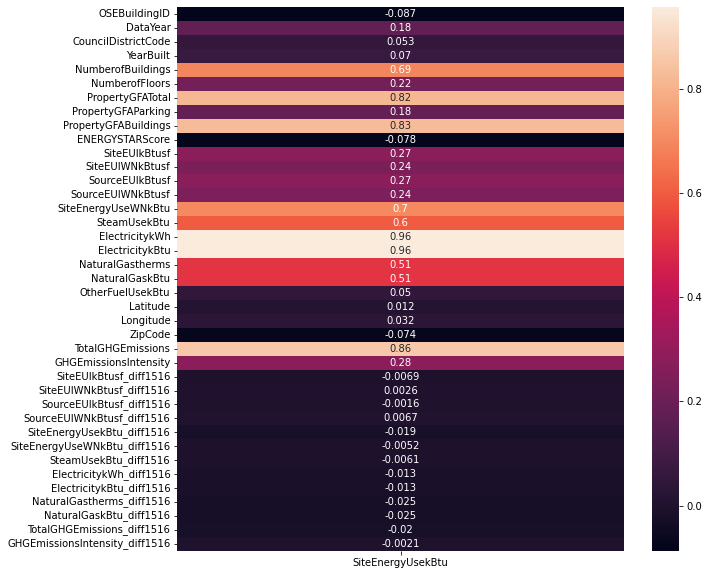

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(datas.corr().filter(cible).drop(cible), annot=True)

Varaiables non nécessaires pour la régression:
1. ZipCode
2. Longitude
3. Latitude
4. DataYear
5. OSEBuildingID
6. DefaultData

Nouvelles variables:
1. PropertyGFABuilding/NumberofFloors
2. PropertyGFABuilding/NumberofBuildings
3. HasParking => Booleen 0 if PropertyGFAParking == 0 else 1
4. Ratio PropertyGFABuilding/ProprtyGFATotal
5. Ratio PropertyGFAParking/PropertyGFATotal
6. Ratio SteamUse(kBtu)/PropertyGFATotal
7. Ratio Electricity(kBtu)/PropertyGFATotal
8. Ratio NaturalGas(kBtu)/PropertyGFATotal
9. Ratio OtherFuelUse(kBtu)/PropertyGFATotal
10. *** Ratio SiteEnergyUse(kBtu)/SiteEnergyUseWN(kBtu)
11. *** SteamUseWN => SteamUse(kBtu) * Ratio SiteEnergyUse(kBtu)/SiteEnergyUseWN(kBtu)
12. *** ElectricityWN => Electricity(kBtu) * Ratio SiteEnergyUse(kBtu)/SiteEnergyUseWN(kBtu)
13. *** NaturalGasWN => NaturalGas(kBtu) * Ratio SiteEnergyUse(kBtu)/SiteEnergyUseWN(kBtu)
14. *** OtherFuelUseWN => OtherFuelUse(kBtu) * Ratio SiteEnergyUse(kBtu)/SiteEnergyUseWN(kBtu)
15. *** Ratio SteamUse(kBtu)/SiteEnergyUse(kBtu)
16. *** Ratio Electricity(kBtu)/SiteEnergyUse(kBtu)
17. *** Ratio NaturalGas(kBtu)/SiteEnergyUse(kBtu)
18. *** Ratio OtherFuelUse(kBtu)/SiteEnergyUse(kBtu)

In [5]:
def convert_nan(data, cols=None):
    if type(data) == pd.DataFrame:
        if cols is None:
            cols = data.columns
        for col in cols:
            if data[col].dtypes == np.object_:
                data.loc[(data[col].isnull()) | (data[col] == np.inf) | (data[col] == -np.inf), col] = "nan"
            else:
                if data[col].dtypes == np.int64:
                    data[col] = data[col].astype(np.float64)
                data.loc[(data[col].isnull()) | (data[col] < 0), col] = 0
                data[col].replace([-np.inf], 0, inplace=True)
                maxi = data.loc[data[col] != np.inf, col].max()
                data[col].replace([np.inf], maxi, inplace=True)

    else:
        if data.dtypes == np.object_:
            data.replace(np.nan, "nan", inplace=True)
        else:
            data.replace([np.nan, -np.inf], 0, inplace=True)
            maxi = data[data != np.inf].max()
            data.replace([np.inf], data.max(), inplace=True)

    return data

In [6]:
n_datas = datas.copy()

cat_features = nom_features + ord_features

n_datas = convert_nan(n_datas, cat_features)
n_datas = convert_nan(n_datas, num_features)
n_datas = convert_nan(n_datas, num_features_a_diss)
n_datas = convert_nan(n_datas, a_exclure)
n_datas = convert_nan(n_datas, cible)
n_datas = n_datas.drop(columns=["ZipCode", "Longitude", "Latitude", "DataYear",  "DefaultData"])

## Variables catégorielles

### Uniformisation des valeurs des variables catégorielles

1. "PrimaryPropertyType" déjà effectuée lors de l'étape 1
2. "CouncilDistrictCode", "YearBuilt", "NumberofFloors", "NumberofBuildings" sont des valeurs discrètes
3. "Outlier

### Visualisation de la corrélation avec la variable à prédire

In [7]:
n_datas["Outlier"].unique()

array(['nan', 'High Outlier', 'Low Outlier'], dtype=object)

In [8]:
n_datas["Outlier"] = n_datas["Outlier"].apply(lambda x: x.lower())

<AxesSubplot:>

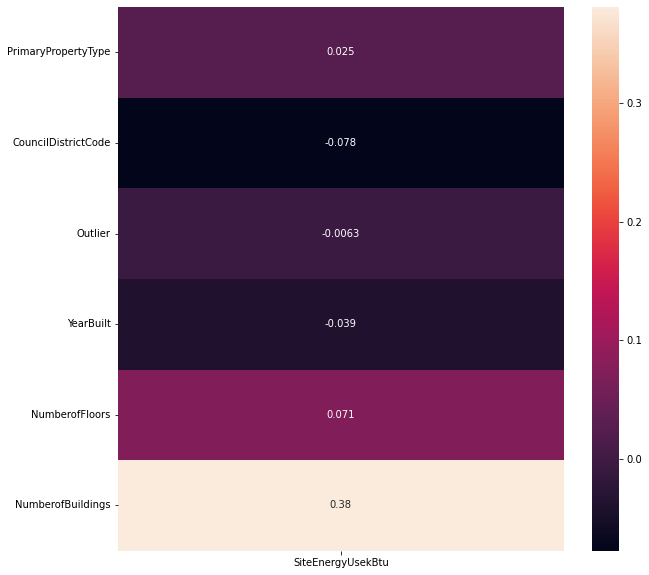

In [9]:
import seaborn as sns

tmp_cat = n_datas[cat_features].copy()

for col in cat_features:
    tmp_cat[col] = pd.factorize(tmp_cat[col])[0]

tmp_cat[cible] = n_datas[cible]

corr_cat = tmp_cat.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_cat, annot=True)

## Variables quantitatives

1. Variables laissées tel quel (num_features)
2. Variables à dissocier pour éviter le data leakage (num_features_a_diss)
3. Variables à exclure de la modélisation (a_exclure)

### 1. num_features

Visualisation de la corrélation avec la variables à prédire et étude des la distribution

<AxesSubplot:>

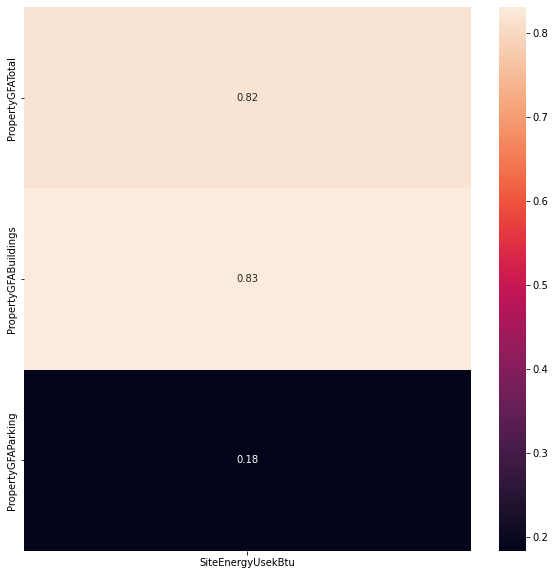

In [10]:
tmp_num = n_datas[num_features].copy()

tmp_num[cible] = n_datas[cible]

corr_num = tmp_num.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_num, annot=True)

Je double le nombre de classes pour avoir un histogramme plus précis

In [11]:
def histogr(datas, cols):
    nb_classes = round(1 + np.log2(len(datas))) * 2

    plt_cols_full = len(cols) // 3
    if len(cols) % 3 != 0:
        plt_col_suppl = 1
    else:
        plt_col_suppl = 0
    plt_cols = plt_cols_full + plt_col_suppl

    fig = plt.figure(figsize=(15, 5 * plt_cols))
    for num, col in enumerate(cols):
        ax = fig.add_subplot(plt_cols, 3, num+1)
        skew = round(datas[col].skew(), 3)
        kurt = round(datas[col].kurtosis(), 3)
        ax.hist(datas[col], bins=nb_classes, label= f"Skewness: {skew}\nKurtosis: {kurt}")
        ax.set_title(col, fontsize=14)
        ax.legend()



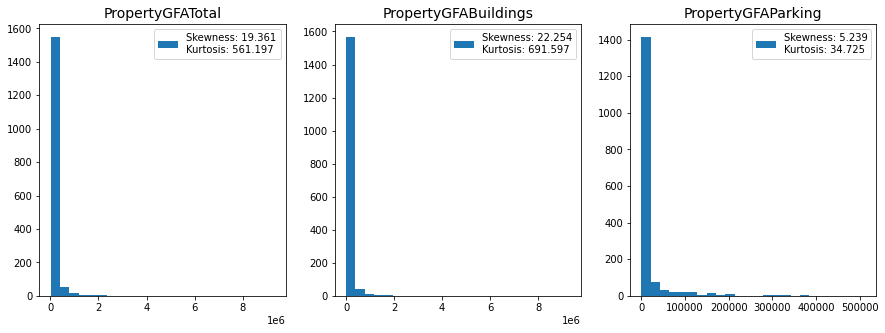

In [12]:
histogr(n_datas, num_features)

On peut voir sur les trois histogrammes que les valeurs sont très concentrées sur la gauche

Il s'agit maintenant de normaliser les distributions pour comparer

In [13]:
def to_log(data):
    tmp = convert_nan(data)
    return np.log(tmp + 1)

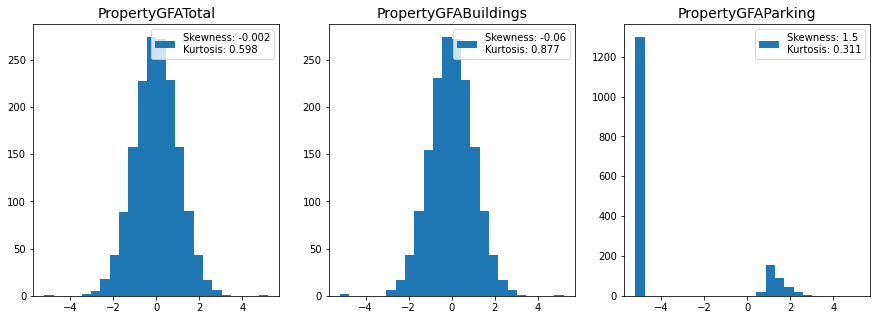

In [14]:
from sklearn.preprocessing import QuantileTransformer

tmp_num = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[num_features]), 
    columns=num_features)

histogr(tmp_num, tmp_num.columns)


### 1. Conclusion num_features

Pour commencer "PropertyGFATotal" est la somme de "PropertyGFABuildings" et "PropertyGFAParking"

"PropertyGFATotal" et "PropertyGFABuildings" ont quasiment le même coefficient de corrélation avec "SiteEnergyUsekBtu" (0.61 et 0.63). 

J'aurais donc tendance à vouloir garder la variable avec le plus haut coefficient ("PropertyGFABuildings") et supprimer la seconde. D'autant plus qu'en faisant cela, si je garde aussi "PropertyGFAParking", c'est comme déboubler la variable "PropertyGFATotal"

On peut voir aussi des valeurs semblant être des outliers pour -4 < "PropertyGFABuildings" < 4 que je vais retirer. Idem pour la variable "PropertyGFATotal"

Pour rappel, les limites des outliers sont fixées à 3 écart-types. Cette valeur sera utilisée par la suite

Enfin, ces variables seront à transformer pour la modelisation

In [15]:
n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(
    n_datas["PropertyGFABuildings"].to_numpy().reshape(-1, 1))
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)

n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(
    n_datas["PropertyGFATotal"].to_numpy().reshape(-1, 1))
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


### 2. num_features_a_diss

Visualisation de la corrélation avec la variables à prédire et étude des la distribution

<AxesSubplot:>

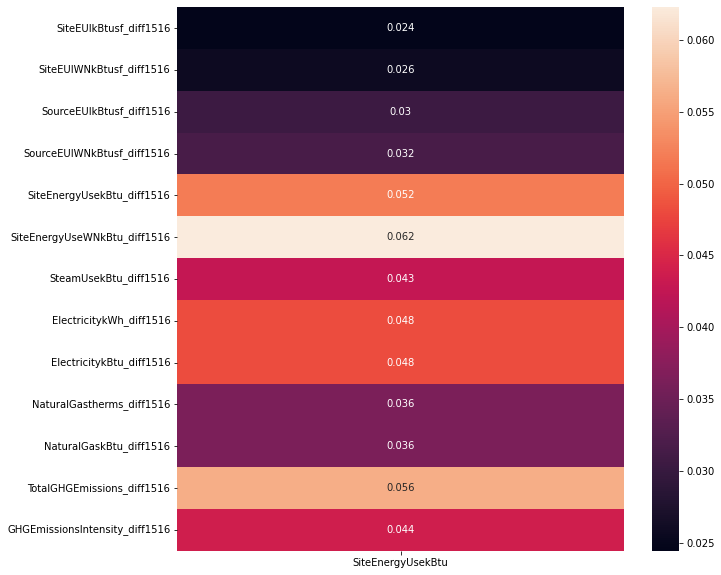

In [16]:
tmp_num_diss = n_datas[num_features_a_diss].copy()

tmp_num_diss[cible] = n_datas[cible]

corr_num_diss = tmp_num_diss.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_num_diss, annot=True)

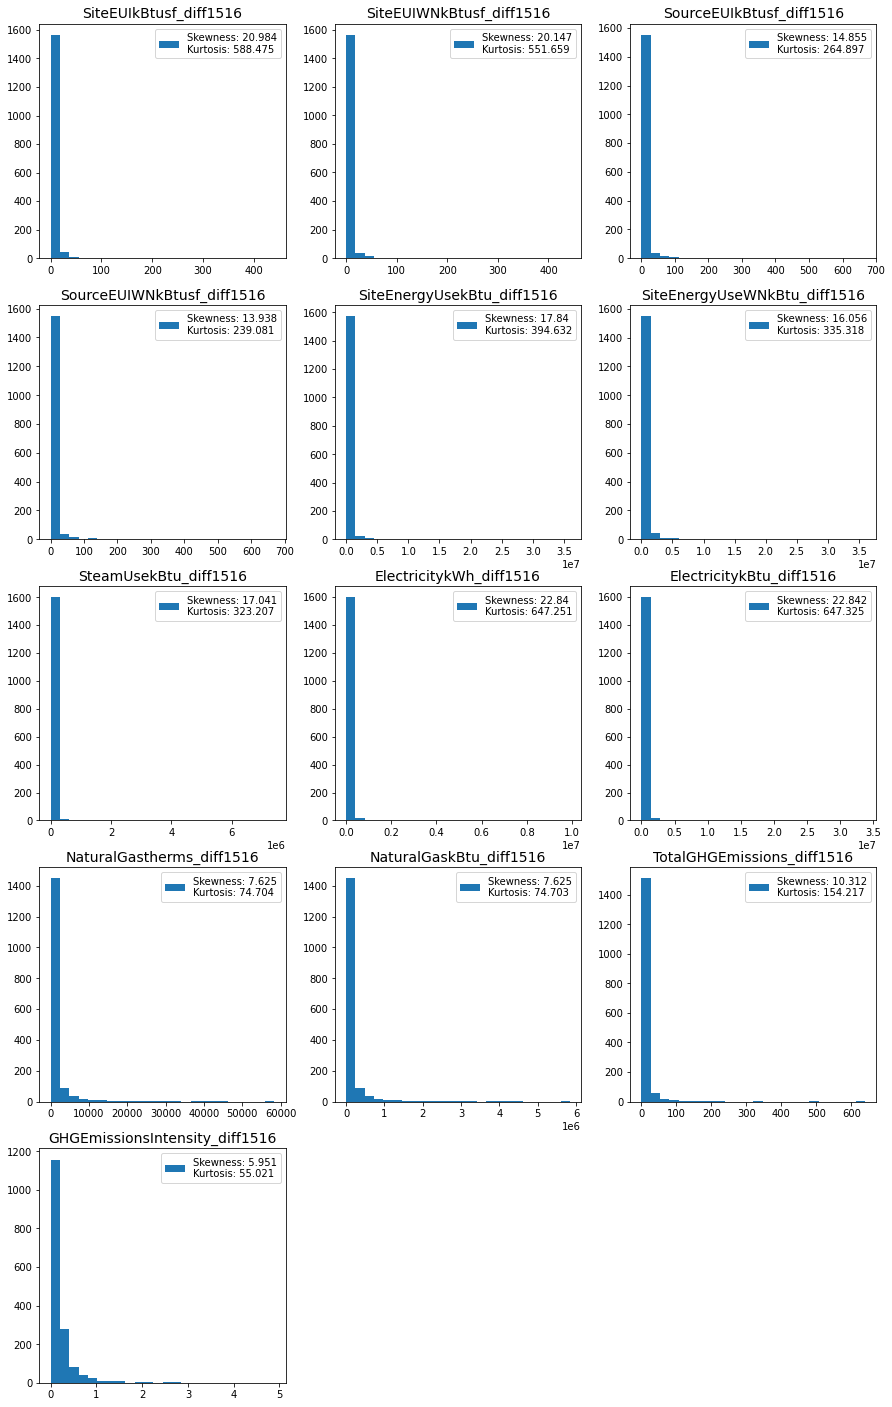

In [17]:
histogr(n_datas, num_features_a_diss)

Absolument toutes les variables sont très concentrées à gauches. Il faut les normaliser d'autant plus qu'elles n'ont pas le même ordre de grandeur

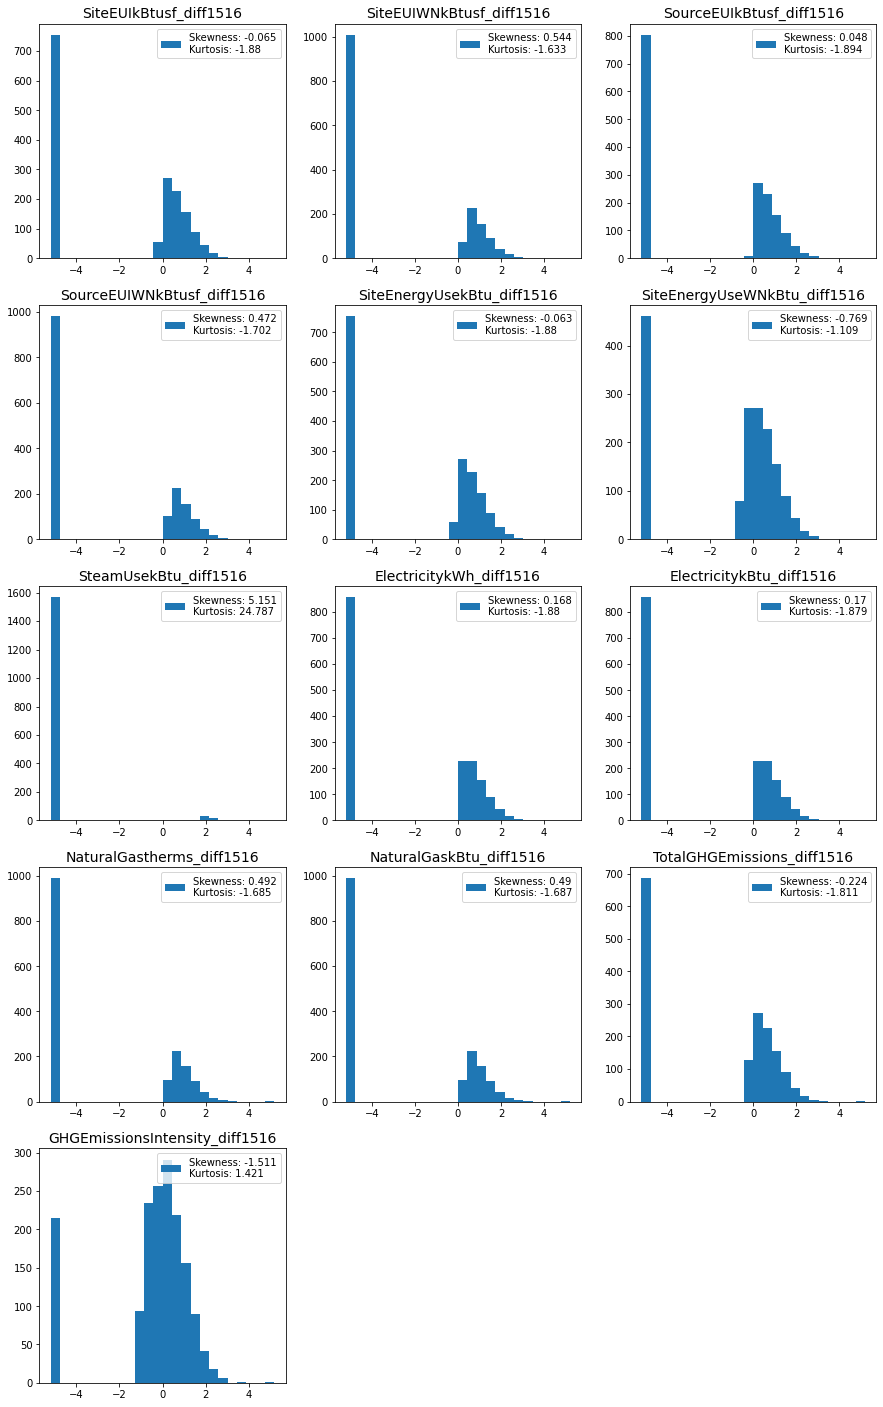

In [18]:
tmp_num_diss = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[num_features_a_diss]), 
    columns=num_features_a_diss)

histogr(tmp_num_diss, tmp_num_diss.columns)


### 2. Conclusion num_features_a_diss

Après normalisation, il semble y avoir beaucoup de outliers notamment inférieurs à -4. Ces variables ne seront peut-être pas gardées pour la modélisation

Néanmoins, je vais quand même droper les variables "ElectricitykWh_diff1516" et "NaturalGastherms_diff1516" qui ont le même coefficient de corrélation que leurs homologues en kBtu et la même distribution. Cela fait doublon.


In [19]:
n_datas = n_datas.drop(columns=["ElectricitykWh_diff1516", "NaturalGastherms_diff1516"])


### 3. a_exclure

Visualisation de la corrélation avec la variables à prédire et étude des la distribution

<AxesSubplot:>

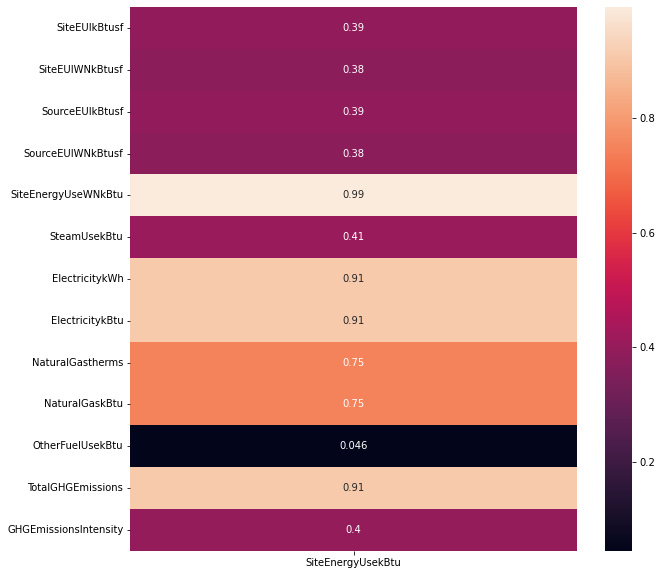

In [20]:
tmp_a_excl = n_datas[a_exclure].copy()

tmp_a_excl[cible] = n_datas[cible]

corr_a_excl = tmp_a_excl.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_a_excl, annot=True)

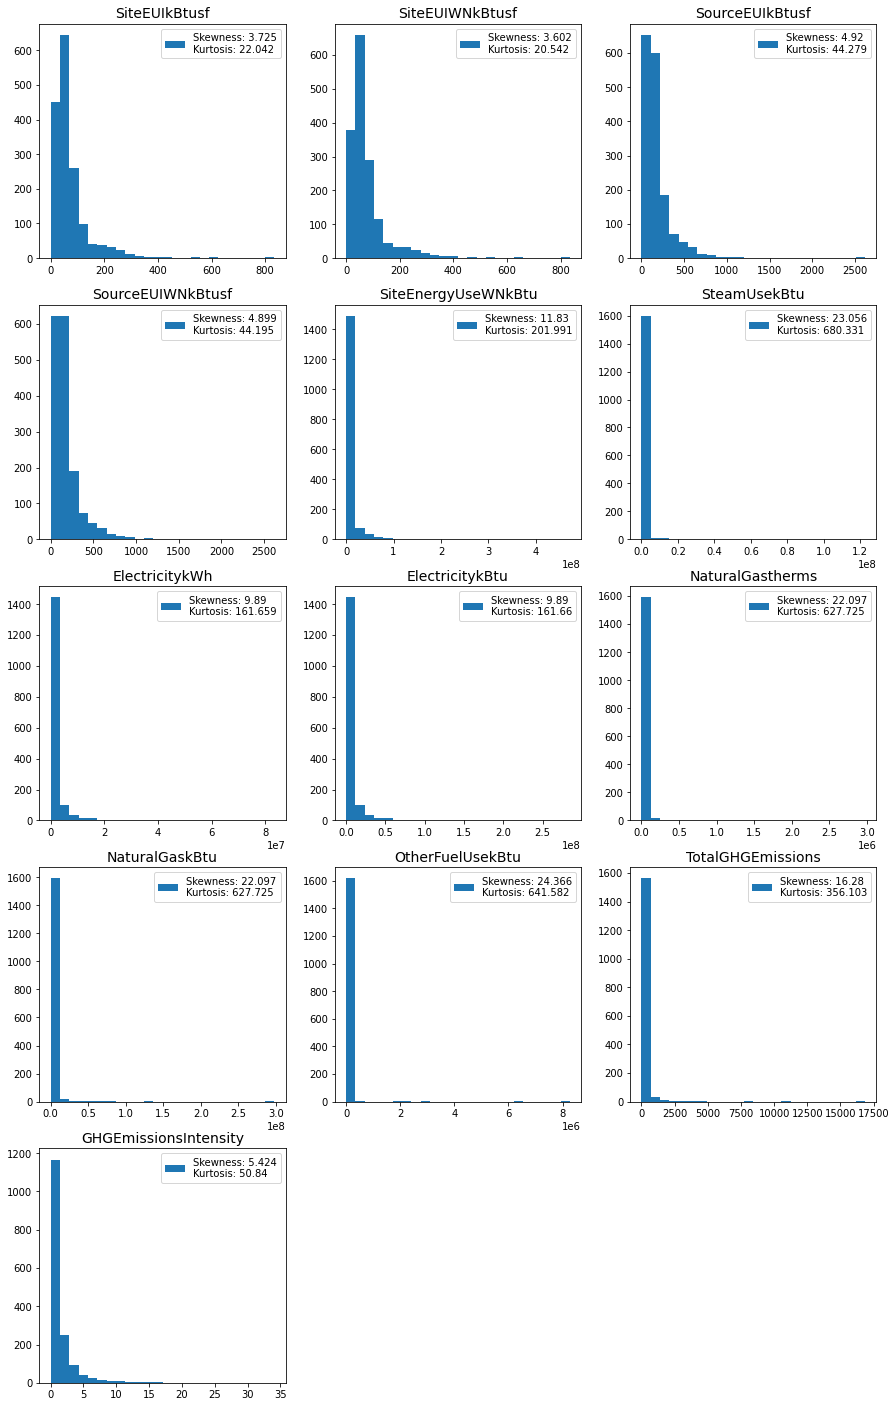

In [21]:
histogr(n_datas, a_exclure)

On peut voir ici aussi que les vairables sont fortements concentrées sur la gauche

Je vais de nouveau procéder à une normalisation

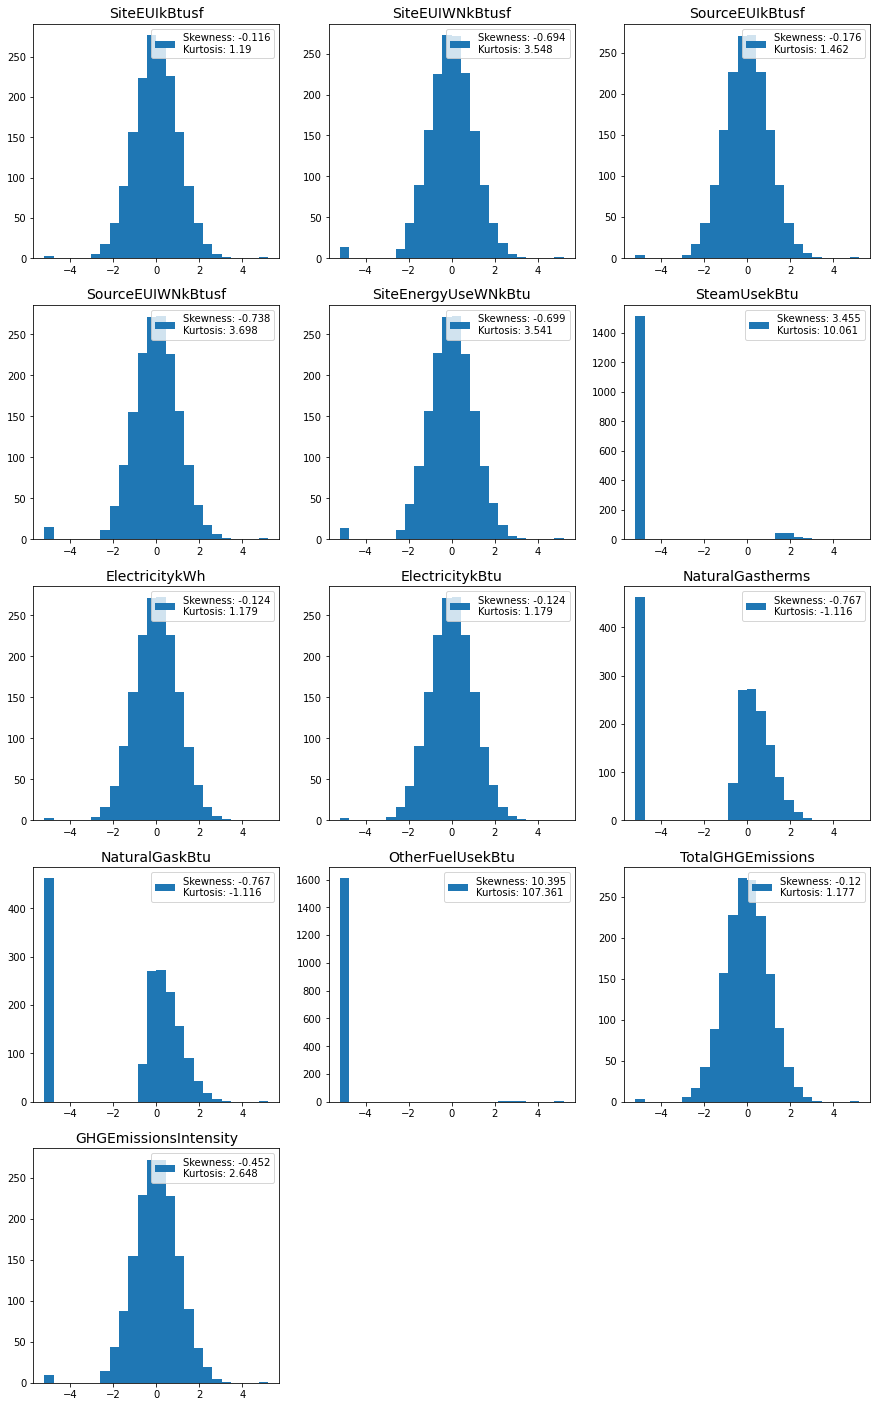

In [22]:
tmp_a_excl = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[a_exclure]), 
    columns=a_exclure)

histogr(tmp_a_excl, tmp_a_excl.columns)


### 3. Conclusion a_exclure

Pour "SteamUsekBtu" et "OtherFuelUsekBtu", on peut voir de nombreuses valeurs (de l'ordre de 1500) inférieures à la limite des outliers définie précédemment, c'est-à-dire -4. Ces deux variables seront probablement exclues de la prédiction

Pour "NaturalGastherms" et "NaturalGaskBtu", ces outliers bas sont présents mais beaucoup moins nombreux (de l'ordre de 500). Il sera peut-être possible de les garder pour la prédiction

Quant aux autres variables, elles sont correctement normalisées. On peut néanmoins voir quelques outliers qu'il faut retirer

De plus, les variables "ElectricitykWh", "ElectricitykBtu" et "NaturalGastherms", "NaturalGaskBtu" font références aux mêmes valeurs, avec les mêmes coefficients de corrélation mais avec des unités différentes, je vais donc en garder qu'une sur deux à chaque fois

In [23]:
tmp_cols = [x for x in a_exclure if x not in ["SteamUsekBtu", "OtherFuelUsekBtu", "NaturalGastherms", "NaturalGaskBtu"]]

for col in tmp_cols:
    n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[col].to_numpy().reshape(-1,1))
    n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


In [24]:
n_datas = n_datas.drop(columns=["ElectricitykWh", "NaturalGastherms", "transf"])
n_datas.to_csv("Pélec_06_notebook.csv", index=False)